# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adek Putri Dewanti
- **Email:** adekdewanti23@gmail.com
- **ID Dicoding:** adek_putri_dewanti

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap banyaknya total penyewa sepeda (casual dan registered)? Hubungkan pengaruh musim dengan tren yang terbentuk di tiap bulan!
2. Bagaimana pengaruh holiday, weekday, dan workingday terhadap banyaknya total penyewa sepeda ?
3. Bagaimana pengaruh kondisi cuaca terhadap banyaknya total penyewa sepeda ?
4. Bagaimana pengaruh temperatur lingkungan dan kecepatan angin pada saat itu terhadap banyaknya total penyewa sepeda?
5. Bagaimana tren penyewaan sepeda antara tahun 2011 dan 2012? Apakah semakin banyak penyewa atau semakin sedikit?



## Import Semua Packages/Library yang Digunakan

In [1]:
# Data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt

## Data Wrangling

### Gathering Data
Pada tahap pengumpulan data ini, dikumpulkan dari dataset Bike Sharing yang terdiri dari dua file csv yaitu hour.csv dan day.csv

#### About of each Dataset
1. hour.csv : jumlah Bike Sharing yang dikumpulkan setiap jam. Catatan: 17379 jam
2. day.csv : jumlah Bike Sharing yang dikumpulkan setiap hari. Catatan: 731 hari


In [2]:
# Buka Dataset

day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

Hour.csv dan day.csv memiliki kolom berikut, kecuali hr yang tidak tersedia di day.csv

- instan: rekor indeks
- dteday : tanggal
- season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- year : tahun (0: 2011, 1:2012)
- month: bulan (1 hingga 12)
- hour : jam (0 hingga 23)
- holiday : hari cuaca libur atau tidak (disarikan dari http://dchr.dc.gov/page/holiday-schedule)
- weekday : hari dalam seminggu
- working day : jika hari bukan akhir pekan atau hari libur adalah 1, sebaliknya adalah 0.
- weathershit :
-- 1 : Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
-- 2 : Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
-- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
-- 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut
- temp : Suhu normal dalam Celsius. Nilainya dibagi menjadi 41 (maks)
- atemp : Menormalkan suhu perasaan dalam Celcius. Nilainya dibagi 50 (maks)
- hum: Kelembapan yang dinormalisasi. Nilainya dibagi menjadi 100 (maks)
- wind speed: Kecepatan angin yang dinormalisasi. Nilainya dibagi menjadi 67 (maks)
- casual : jumlah pengguna biasa
- registred: jumlah pengguna terdaftar
- cnt: hitungan total sewa sepeda termasuk sepeda casual dan registred


In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

 Pada proses ini kita akan dinilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data hour.csv dan day.csv

### **Assessing day_df**

1.) Memeriksa Data Type

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kesalahan Type Data:
1. dteday type datanya object, harusnya datetime

2.) Memeriksa Missing Value

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang hilang dari day_df

3.) Memeriksa Data Duplicate

In [7]:
print('Jumlah data yang terduplikat dalam dataframe day sebanyak:', day_df.duplicated().sum())

Jumlah data yang terduplikat dalam dataframe day sebanyak: 0


4.) Pengecekan nilai statistik dalam dataframe

In [8]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Data statistik day_df lengkap dan dalam jumlah yang benar semua

### **Assessing hour_df**

1.) Memeriksa Data Type

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kesalahan Type Data:
1. dteday type datanya object, harusnya datetime

2.) Memeriksa Missing Value

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada nilai yang hilang pada hour_df

3.) Memeriksa Data Duplicate

In [11]:
print('Jumlah data yang terduplikasi pada hour_df sebanyak:',hour_df.duplicated().sum())

Jumlah data yang terduplikasi pada hour_df sebanyak: 0


4.) Pengecekan nilai statistik dalam dataframe

In [12]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Data statistik hour_df lengkap dan dalam jumlah yang benar semua

### Cleaning Data

1.) Penghapusan dataframe yang Tidak Perlu

Pada tahap cleaning data akan dihapus dataframe hour. Alasan daripada penghapusan ini adalah diantara dataframe hour dan day memiliki parameter kolom yang sama, perbedaannya hanya di kolom hour saja, sehingga kita akan lebih fokus untuk menganalisis dataframe day saja. Selain itu, apabila analisis juga dilakukan pada hour_df, tidak relevan dengan pertanyaan bisnis yang telah dibuat.

In [13]:
del hour_df

2.) Mengubaah Penamaan tiap Features

Mengubah judul tiap kolom (features) agar mempermudah proses analisis dan agar tampak lebih rapi.


In [14]:
day_df.rename(columns={
    'dteday':'dateday',
    'yr' : 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace= True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3.) Penghapusan Beberapa Kolom yang Tidak Diperlukan untuk Analisis

Berdasarkan pertanyaan bisnis yang telah dibuat, kolom yang akan dihapus atau di drop adalah:
- instant : Karena penomoran index ini tidak menambahkan hal yang berguna untuk dianalisis.
- atemp : Feature tidak sesuai dengan pertanyaan bisnis, jadi tidak perlu ikut untuk dianalisis.
- humadity : Feature tidak sesuai dengan pertanyaan bisnis, jadi tidak perlu ikut untuk dianalisis.

In [15]:
drop_col = ['instant', 'atemp', 'humidity']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temperature,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.186900,82,1518,1600


4.) Mengubah Tipe Data di beberapa Features

Beberapa tipe data yang termasuk numerik (integer) akan diubah menjadi category, akan mempermudah analisis. Selain itu, tipe data dteday akan diubah menjadi datetime.

In [16]:
# Dengan filtering lalu menggunakan method map

day_df['season'] = day_df['season'].map({
    1:'spring', 2:'summer', 3:'fall', 4:'winter'
})

day_df['year'] = day_df['year'].map({
    0: 2011, 1: 2012
})

day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Partly Cloudy',
    2: 'Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [17]:
# Ubah tipe data dateday yang awalnya object menjadi datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubah tipe data yang sebelumnya telah di mapping
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')

In [18]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temperature,windspeed,casual,registered,count
0,2011-01-01,spring,2011,Jan,0,Sat,0,Cloudy,0.344167,0.160446,331,654,985
1,2011-01-02,spring,2011,Jan,0,Sun,0,Cloudy,0.363478,0.248539,131,670,801
2,2011-01-03,spring,2011,Jan,0,Mon,1,Partly Cloudy,0.196364,0.248309,120,1229,1349
3,2011-01-04,spring,2011,Jan,0,Tue,1,Partly Cloudy,0.200000,0.160296,108,1454,1562
4,2011-01-05,spring,2011,Jan,0,Wed,1,Partly Cloudy,0.226957,0.186900,82,1518,1600


In [19]:
# Cek apakah tipe datanya sudah berubah atau belum

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   temperature        731 non-null    float64       
 9   windspeed          731 non-null    float64       
 10  casual             731 non-null    int64         
 11  registered         731 non-null    int64         
 12  count              731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(2), int64(3)
memory us

In [20]:
day_df.describe()

,temperature,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.507463,3410.000000,6946.000000,8714.000000


## Exploratory Data Analysis (EDA)

### Explore day_df

Dalam eksplorasi analisis data ini akan digunakan dataframe day yang telah diproses pada tahap cleaning data.

In [21]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temperature,windspeed,casual,registered,count
0,2011-01-01,spring,2011,Jan,0,Sat,0,Cloudy,0.344167,0.160446,331,654,985
1,2011-01-02,spring,2011,Jan,0,Sun,0,Cloudy,0.363478,0.248539,131,670,801
2,2011-01-03,spring,2011,Jan,0,Mon,1,Partly Cloudy,0.196364,0.248309,120,1229,1349
3,2011-01-04,spring,2011,Jan,0,Tue,1,Partly Cloudy,0.200000,0.160296,108,1454,1562
4,2011-01-05,spring,2011,Jan,0,Wed,1,Partly Cloudy,0.226957,0.186900,82,1518,1600


1.) Agregasi day_df dengan features antara musim dengan total penyewa sepeda termasuk banyaknya penyewa casual dan registered.

In [22]:
day_df.groupby(by=['season','month']).agg({
    'registered': 'sum',
    'casual' : 'sum',
    'count' : 'sum'
})

registered  casual   count
season month                            
fall   Apr             0       0       0
       Aug        279155   72039  351194
       Dec             0       0       0
       Feb             0       0       0
       Jan             0       0       0
       Jul        266791   78157  344948
       Jun         91627   23761  115388
       Mar             0       0       0
       May             0       0       0
       Nov             0       0       0
       Oct             0       0       0
       Sep        197465   52134  249599
spring Apr             0       0       0
       Aug             0       0       0
       Dec         36535    6463   42998
       Feb        136389   14963  151352
       Jan        122891   12042  134933
       Jul             0       0       0
       Jun             0       0       0
       Mar        114911   27154  142065
       May             0       0       0
       Nov             0       0       0
       Oct             0       0       0
       Sep             0       0       0
summer Apr        208292   60802  269094
       Aug             0       0       0
       Dec             0       0       0
       Feb             0       0       0
       Jan             0       0       0
       Jul             0       0       0
       Jun        180809   50145  230954
       Mar         69565   17290   86855
       May        256401   75285  331686
       Nov             0       0       0
       Oct             0       0       0
       Sep             0       0       0
winter Apr             0       0       0
       Aug             0       0       0
       Dec        152808   15230  168038
       Feb             0       0       0
       Jan             0       0       0
       Jul             0       0       0
       Jun             0       0       0
       Mar             0       0       0
       May             0       0       0
       Nov        218228   36603  254831
       Oct        262592   59760  322352
       Sep         78203   18189   96392

Terlihat pada musim gugur paling banyak penyewa sepeda berada di bulan Agustus yaitu sebanyak 351194 penyewa. Di musim semi paling banyak penyewa sepeda terjadi di bulan Februari yaitu sebanyak 	151352 penyewa. Musim panas paling banyak penyewa di bulan Mei yaitu sebanyak 331686. Terakhir, di musim dingin/salju paling banyak penyewa terjadi pada bulan Oktober yaitu sebanyak 322352 penyewa.

2.) Agregasi day_df dengan features antara holiday dengan total penyewa sepeda termasuk banyaknya penyewa casual dan registered.

In [23]:
day_df.groupby(by='holiday').agg({
    'casual': ['min','max','sum'],
    'registered' : ['min','max','sum'],
    'count' : 'sum'
})

casual               registered                   count
           min   max     sum        min   max      sum      sum
holiday                                                        
0            2  3410  597658         20  6946  2616586  3214244
1          117  3065   22359        573  5172    56076    78435

Telihat bahwa customer lebih menyukai menyewa sepeda di hari kerja daripada di hari libur atau weekend. Perbandingannya sekitar 1/41 antara penyewa di hari libur dengan dihari kerja. Selain itu jumlah penyewa registered lebih banyak daripada penyewa casual di hari kerja.

3.) Agregasi day_df dengan features antara kondisi cuaca dengan total penyewa sepeda termasuk banyaknya penyewa casual dan registered.

In [24]:
day_df.groupby(by='weather_condition').agg({
    'count' : ['min','max','mean','sum']
})

count                            
                    min   max         mean      sum
weather_condition                                  
Cloudy              605  8362  4035.862348   996858
Light Snow/Rain      22  4639  1803.285714    37869
Partly Cloudy       431  8714  4876.786177  2257952

Customer lebih menyukai menyewa sepeda di kondisi cuaca sedang mendung (Partly Cloud) atau cerah. Sedikit yang menyewa ketika kondisi cuaca sedang hujan atau sedikit salju.

4.) Agregasi day_df dengan features antara temperatur dan kecepatan angin dengan total penyewa sepeda termasuk banyaknya penyewa casual dan registered.

In [25]:
day_df.groupby(by=['temperature','windspeed']).agg({
    'count':'sum'
}).sort_values(by='count', ascending= False)

,,count
temperature,windspeed,
0.752500,0.129354,14274
0.608333,0.247521,8714
0.542500,0.227604,8555
0.650000,0.283583,8395
0.601667,0.116300,8362
...,...,...
0.376522,0.343287,605
0.217500,0.293850,506
0.243333,0.316546,441


Terlihat bahwa besarnya temperature dan windspeed tidak terlalu berpengaruh terhadap banyaknya customer yang menyewa sepeda. Akan tetapi untuk lebih jelasnya akan divisualisasikan nantinya dalam bentuk scatter plot (berdasarkan persebaran).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap banyaknya total penyewa sepeda (casual dan registered)? Hubungkan pengaruh musim dengan tren yang terbentuk di tiap bulan!

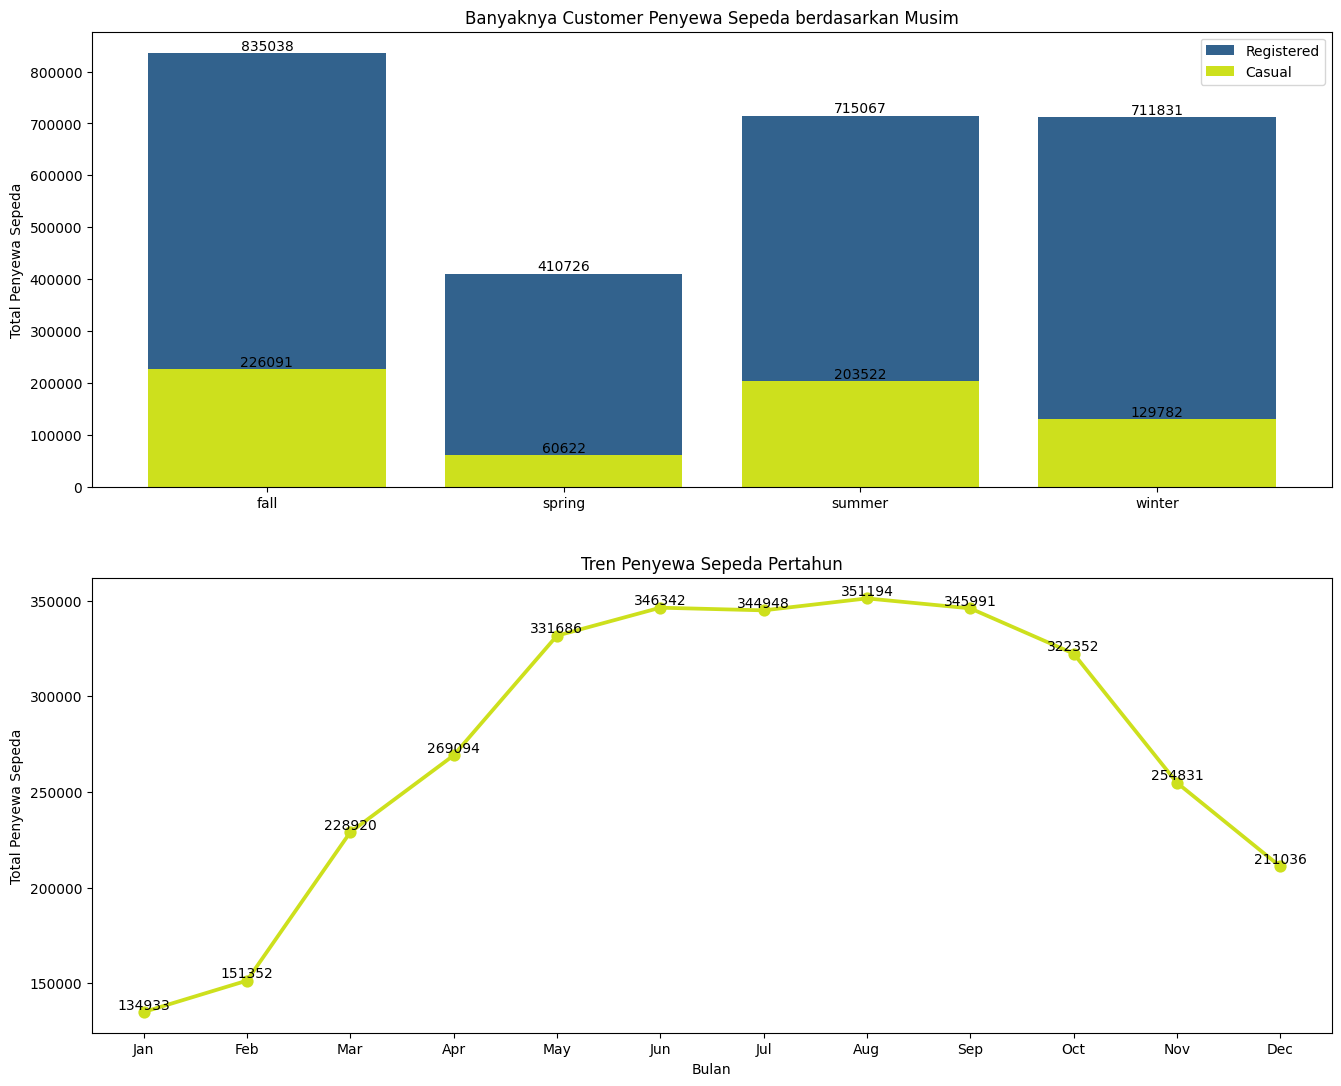

In [26]:
# Tinjau jumlah customer casual dan registered di tiap musim
fig, ax= plt.subplots(nrows=2, ncols=1, figsize=(16, 13))
season = day_df.groupby('season')[['registered', 'casual', 'count']].sum().reset_index()


# Buat bar plot bertumpuk dalam 1 bar (casual dan registered)
ax[0].bar(
    season['season'],
    season['registered'],
    label='Registered',
    color= '#32628d'
)
ax[0].bar(
    season['season'],
    season['casual'],
    label='Casual',
    color= '#cde01d'
)

# Anotate Bar Plot Bertumpuk
for i, value in enumerate(season['registered']):
    ax[0].text(i, value, str(value), ha='center', va='bottom', fontsize=10)

for i, value in enumerate(season['casual']):
    ax[0].text(i, value, str(value), ha='center', va='bottom', fontsize=10)

ax[0].set_xlabel(None)
ax[0].set_ylabel('Total Penyewa Sepeda', fontsize=10)
ax[0].set_title('Banyaknya Customer Penyewa Sepeda berdasarkan Musim', loc='center')
ax[0].legend()



# Visualisasi pointplot untuk Melihat Tren Penyewaan Sepeda tiap Bulan
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)
monthly = day_df.groupby(by='month').agg({
    "count": "sum"
}).reset_index()
sns.set_palette("colorblind")
sns.pointplot(data=monthly,x='month',y='count',ax=ax[1], color='#cde01d')
# Annotate untuk setiap titik
for i, value in enumerate(monthly['count']):
    ax[1].text(i, value, str(value), ha='center', va='bottom', fontsize=10)

ax[1].set_xlabel('Bulan')
ax[1].set_ylabel('Total Penyewa Sepeda')
ax[1].set(title='Tren Penyewa Sepeda Pertahun')


plt.show()



Pada barplot bertumpuk terlihat bahwa customer lebih banyak menyewa sepeda di musim gugur dengan jumlah customer casual dan registered lebih banyak daripada ketiga musim lainnya (musim semi, musim panas, dan musim dingin/salju), yang artinya total penyewa sepeda paling banyak di musim gugur.

Apabila dihubungkan dengan EDA sebelumnya, musim gugur terjadi di bulan Agustus, sehingga penyewaan sepeda meningkat yang diurutkan dari musim semi di bulan Februari, lalu naik ketika musim panas di bulan Mei dan sampai puncaknya di bulan Agustus pada musim gugur, lalu turun secara signifikan di bulan Oktober pada musim dingin/salju.

### Pertanyaan 2: Bagaimana pengaruh holiday, weekday, dan workingday terhadap banyaknya total penyewa sepeda ?

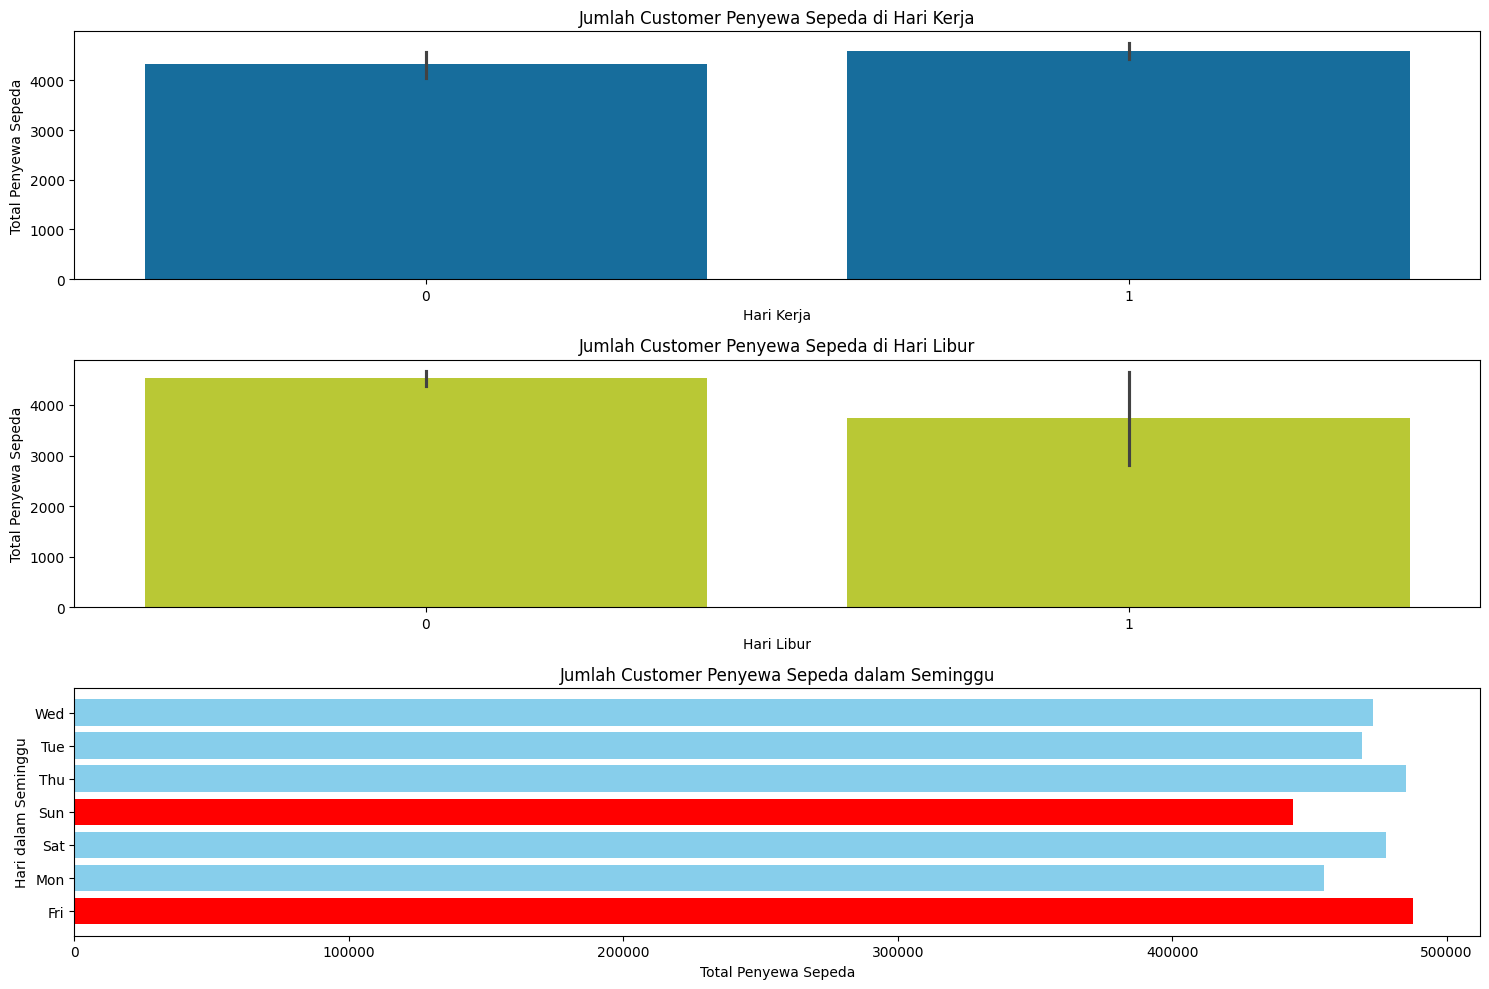

In [27]:
fig, ax= plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Customer di Workingday
sns.barplot(x='workingday',
            y='count',
            data= day_df,
            ax=ax[0])
ax[0].set_xlabel('Hari Kerja')
ax[0].set_ylabel('Total Penyewa Sepeda')
ax[0].set_title('Jumlah Customer Penyewa Sepeda di Hari Kerja')

# Customer di Holiday
sns.barplot(x='holiday',
            y='count',
            data= day_df,
            ax=ax[1],
            color='#cde01d')
ax[1].set_xlabel('Hari Libur')
ax[1].set_ylabel('Total Penyewa Sepeda')
ax[1].set_title('Jumlah Customer Penyewa Sepeda di Hari Libur')

# Customer di Weekday
weekday = day_df.groupby(by='weekday')['count'].sum().reset_index()
warna= ['r','skyblue','skyblue','r','skyblue','skyblue','skyblue']
bars = ax[2].barh(weekday['weekday'], weekday['count'], color= warna)
ax[2].set_xlabel('Total Penyewa Sepeda')
ax[2].set_ylabel('Hari dalam Seminggu')
ax[2].set_title('Jumlah Customer Penyewa Sepeda dalam Seminggu')


plt.tight_layout()
plt.show()

Dari visualisasi data diatas, dapat dinyatakan bahwa:
- Jumlah penyewa sepeda lebih banyak di hari kerja dibandingkan pada hari non-kerja. Hal ini ditunjukkan dengan index 1 lebih tinggi barplotnya dibandingkan index 0 yang menunjukkan hari non-kerja.
- Jumlah penyewa sepeda di hari libur lebih sedikit daripada ketika pada hari biasa (non holiday). Hal ini ditunjukkan dengan index 0 lebih tinggi barplotnya dibandingkan index 1 yang menunjukkan liburan atau holiday.
- Penyewa sepeda terbanyak terjadi di hari Jumat dan paling sedikit di hari Minggu (akhir pekan).

### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap banyaknya total penyewa sepeda ?

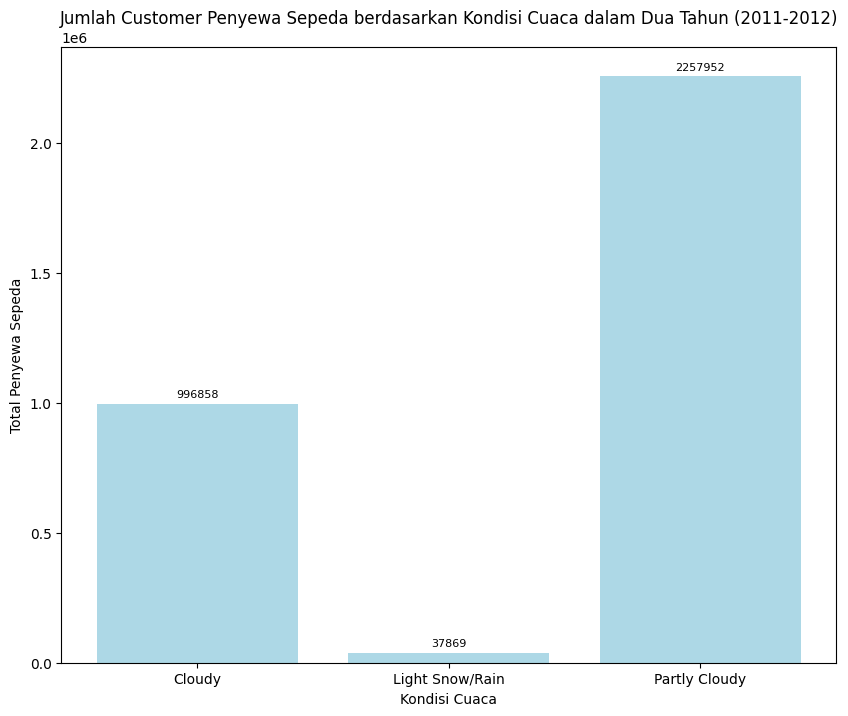

In [28]:
fig, ax= plt.subplots(figsize=(10,8))


weather_cond = day_df.groupby(by='weather_condition')['count'].sum().reset_index()
bars = ax.bar(weather_cond['weather_condition'],
              weather_cond['count'],
              color='lightblue')

# Menambahkan anotasi pada setiap batang
for bar in bars:
    yval = bar.get_height()
    ax.annotate(f'{round(yval, 1)}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # Menambahkan jarak vertikal dari batang
                textcoords="offset points", ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Kondisi Cuaca')
ax.set_ylabel('Total Penyewa Sepeda')
ax.set_title('Jumlah Customer Penyewa Sepeda berdasarkan Kondisi Cuaca dalam Dua Tahun (2011-2012)')
plt.show()


Pada visualisasi barplot diatas, terlihat dalam dua tahun (2011-2012) jumlah penyewa sepeda paling banyak dan selalu ramai ketika kondisi cuaca sedang cerah/sedikit mendung, lalu posisi kedua diikuti ketika cuaca berawan. Dan yang terakhir, customer kurang minat menyewa sepeda ketika kondisi cuaca bersalju atau sedang hujan.

### 4.  Bagaimana pengaruh temperatur lingkungan dan kecepatan angin pada saat itu terhadap banyaknya total penyewa sepeda?

Text(0.5, 1.0, 'Kecepatan Angin vs Jumlah Customer')

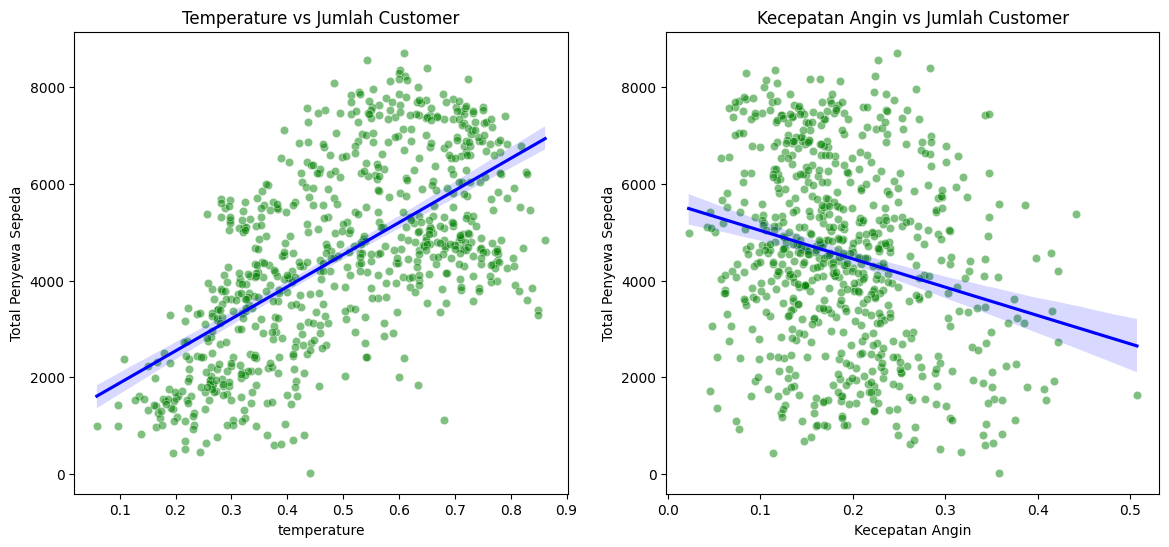

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

# Scater Plot Temperature vs Jumlah Customer
sns.scatterplot(
    x='temperature',
    y='count',
    data=day_df,
    alpha=0.5,
    color='g'
)
# Gradien Temperature vs Jumlah Customer
sns.regplot(
    x='temperature',
    y='count',
    data=day_df,
    scatter=False,  # Menghilangkan titik-titik scatter agar hanya gradien yang terlihat
    color='blue', # Warna garis gradien
)
plt.ylabel('Total Penyewa Sepeda')
plt.title('Temperature vs Jumlah Customer')

# Scatterplot Kecepatan Angin vs Jumlah Customer
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='windspeed',
    y='count',
    data=day_df,
    alpha=0.5,
    color='g'
)
# Gradien Kecepatan Angin vs Jumlah Customer
sns.regplot(
    x='windspeed',
    y='count',
    data=day_df,
    scatter=False,  # Menghilangkan titik-titik scatter agar hanya gradien yang terlihat
    color='blue',  # Warna garis gradien
)
plt.xlabel('Kecepatan Angin')
plt.ylabel('Total Penyewa Sepeda')
plt.title('Kecepatan Angin vs Jumlah Customer')



Berdasarkan visualisasi scatter plot diatas, dapat disimpulkan:
- Hubungan antara suhu (temperature) dengan banyaknya customer penyewa sepeda membentuk gradien positif atau korelasi positif. Ini artinya semakin tinggi suhu (temperature), semakin banyak juga customer yang menyewa sepeda.

- Hubungan antara kecepatan angin (windspeed) dengan banyaknya customer penyewa sepeda membentuk gradien negatif (korelasi negatif). Ini artinya, semakin tinggi kecepatan angin, semakin sedikit customer yang menyewa sepeda.

Korelasi positif menunjukkan bahwa adanya kecenderungan peningkatan variabel dependen (jumlah customer penyewa sepeda) ketika variabel independen (temperature) meningkat. Sebaliknya, korelasi negatif menunjukkan kecenderungan penurunan jumlah customer penyewa sepeda ketika kecepatan angin meningkat.

### 5. Bagaimana tren penyewaan sepeda antara tahun 2011 dan 2012? Apakah semakin banyak penyewa atau semakin sedikit?

<ipython-input-30-25a23ed22507>:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.pointplot(x='month', y='count', hue='year', data=year_month.reset_index(), markers="o", palette= bright_palette)


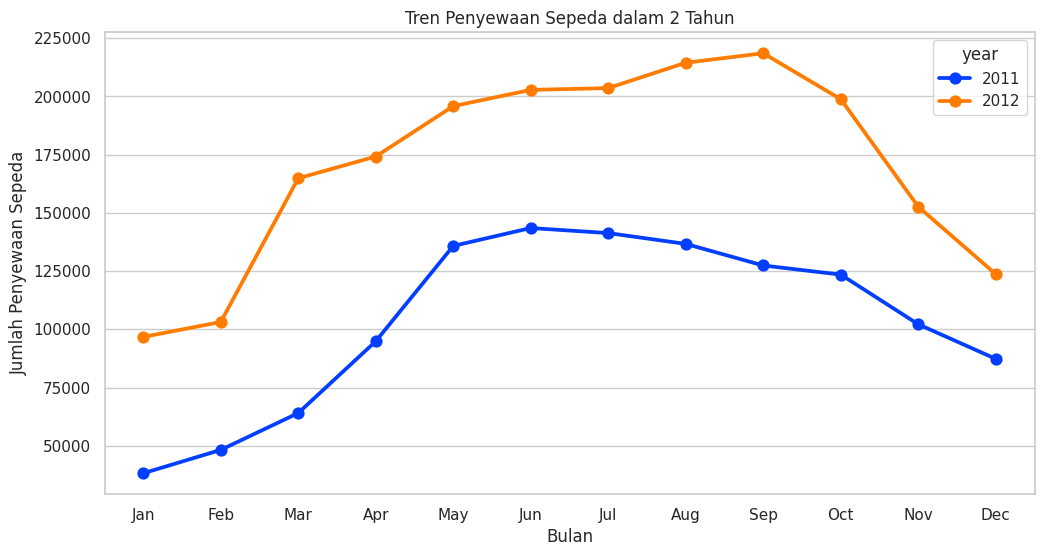

In [30]:
# Agregasi tahun dan bulannya dengan jumlah penyewa sepeda
year_month = day_df.groupby(by=['year','month']).agg({
    'count':'sum'
})

# Set style
sns.set(style="whitegrid")
bright_palette = sns.color_palette('bright')

# Visualisasi pointplot
plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='count', hue='year', data=year_month.reset_index(), markers="o", palette= bright_palette)
plt.title('Tren Penyewaan Sepeda dalam 2 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


Pada visualisasi pointplot menggunakan seaborn diatas menunjukkan bahwa tren penyewaan sepeda di sepanjang tahun 2012 lebih ramai dibandingkan pada tahun 2011. Puncak penyewaan sepeda terjadi di bulan September tahun 2012, sedangkan di tahun 2011 puncak penyewaan terjadi di bulan Juni. Di kedua tahun tersebut, penyewaan paling sedikit terjadi ketika bulan Januari.

## Conclusion

- Conclution pertanyaan 1 : Customer lebih banyak menyewa sepeda di musim gugur dengan jumlah customer casual dan registered lebih banyak daripada ketiga musim lainnya (musim semi, musim panas, dan musim dingin/salju), yang artinya total penyewa sepeda paling banyak di musim gugur. Apabila dihubungkan dengan EDA sebelumnya, musim gugur terjadi di bulan Agustus, sehingga penyewaan sepeda meningkat yang diurutkan dari musim semi di bulan Februari, lalu naik ketika musim panas di bulan Mei dan sampai puncaknya di bulan Agustus pada musim gugur, lalu turun secara signifikan di bulan Oktober pada musim dingin/salju.

- Conclution pertanyaan 2 : Jumlah penyewa sepeda lebih banyak di hari kerja dibandingkan pada hari non-kerja. Selain itu jumlah penyewa sepeda di hari libur lebih sedikit daripada ketika pada hari biasa (non holiday). Lalu berdasarkan hari, penyewa sepeda terbanyak terjadi di hari Jumat dan paling sedikit di hari Minggu (akhir pekan).

- Conclution pertanyaan 3 : Dalam dua tahun (2011-2012) jumlah penyewa sepeda paling banyak dan selalu ramai ketika kondisi cuaca sedang cerah/sedikit mendung, lalu posisi kedua diikuti ketika cuaca berawan. Dan yang terakhir, customer kurang berminat menyewa sepeda ketika kondisi cuaca bersalju atau sedang turun hujan.

- Conclution 4 : Korelasi positif menunjukkan bahwa adanya kecenderungan peningkatan variabel dependen (jumlah customer penyewa sepeda) ketika variabel independen (temperature) meningkat. Sebaliknya, korelasi negatif menunjukkan kecenderungan penurunan jumlah customer penyewa sepeda ketika kecepatan angin meningkat.

- Conclution 5 : tren penyewaan sepeda di sepanjang tahun 2012 lebih ramai dibandingkan pada tahun 2011. Puncak penyewaan sepeda terjadi di bulan September tahun 2012, sedangkan di tahun 2011 puncak penyewaan terjadi di bulan Juni. Di kedua tahun tersebut, penyewaan paling sedikit terjadi ketika bulan Januari.

In [31]:
# Jadikan dataframe day yang telah di cleaning menjadi dataframe baru yang siap didownload
day_df.to_csv("daynew_data.csv", index=False)